<a href="https://colab.research.google.com/github/strejo4/ColabFiles_UACJ_PADP/blob/main/Visualizacion_de_datos_con_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/ClassFiles/Titanic-Dataset.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


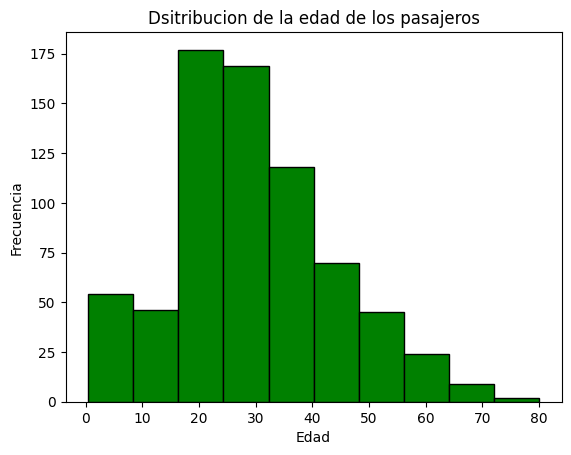

In [7]:
#Usar matplotlib para imprimir un histograma. Lo que estamos graficando aqui es una funcion de densidad de probabilidad. Queremos comprobar como se ocmportaan los datos.

df = df.dropna(subset = ['Age']) #SUrpimir datos vacios o que estan incompletos en el CSV . Pregunta:Es necesario simpre correr esta linea para conjunto de datos muy grandes donde no tengamos visibilidad si hay datos vacios?
plt.hist(df['Age'],bins=10,color = 'green', edgecolor = 'black')
plt.title('Dsitribucion de la edad de los pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

#En este caso parecen datos normales. Pero hay que comprobarlo.

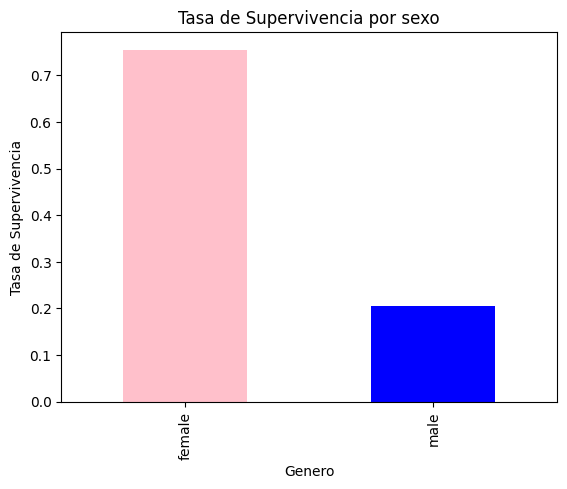

In [10]:
# RELACION ENTRE SUPERVIVENCIA Y SU GENERO
# ssr = sobrevivientes por sexo

ssr = df.groupby('Sex')['Survived'].mean()
ssr.plot(kind='bar', color=['pink','blue'])
plt.title('Tasa de Supervivencia por sexo')
plt.xlabel('Genero')
plt.ylabel('Tasa de Supervivencia')
plt.show()

#Segun la estadistica descriptiva de la media, las mujeres tenian un poco mas de doble de posibilidades de sobrevivir que un hombre.

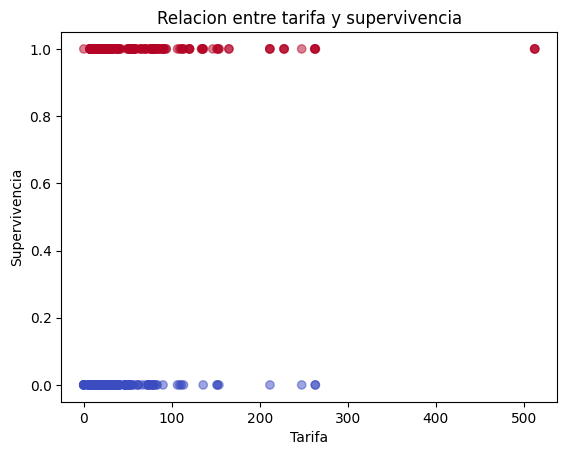

In [11]:
#Graficas scatter plots (graficas de dispersion). Graficas de dispersion para encontrar una relacion entre la tarifca vs. supervivencia

plt.scatter(df['Fare'],df['Survived'],alpha = 0.5, c = df['Survived'], cmap = 'coolwarm') #cmap tipo de grafica de dispersion. Coolwarm da colores en los puntos muy frios o intensos.
#Este factor alpha sirve para los scatter plots. Cuando tenemos datos muy grandes,
#si el dato se repite muchas veces o esta muy junto, el scatterplot va a colocar puntos en ese espacio y se vera empalmado
# Alpha es un factor de transparencia y se puede mover de 0 a 1.
#Si alpha = 0 la transparencia es invisible alpha = 1 los datos son no transparentes, se van a notar puntos emplamados. Si alpha = 0.5, se desvanencen un poco los datos.

plt.title('Relacion entre tarifa y supervivencia')
plt.xlabel('Tarifa')
plt.ylabel('Supervivencia')
plt.show()

#Aqui podemos ver como en base la tarifa si la taza supervivencia esta afectada directamente por este factor. En este caso no se ve como una relacion directa.


/tmp/ipython-input-2062269833.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([sobrevivio['Age'].dropna(),no_sobrevivio['Age'].dropna()], labels = ['Sobrevivientes', 'No Sobrevivientes'])


Text(0, 0.5, 'Edad')

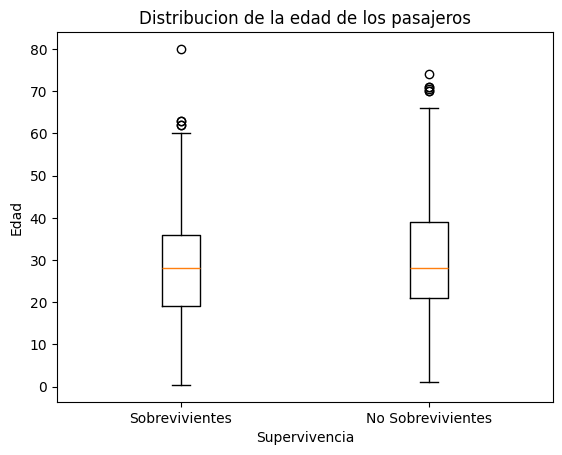

In [14]:
#Como realizar un box plot.  Identifica algunos elementos para saber que tan lejos estan los datos de la media o encontrar datos atipico
# Necesitamos identificar estos datos para suprimirlos ya que ese dato puede afectar nuestro analisis.

sobrevivio = df[df['Survived'] == 1]
no_sobrevivio = df[df['Survived'] == 0]

plt.boxplot([sobrevivio['Age'].dropna(),no_sobrevivio['Age'].dropna()], labels = ['Sobrevivientes', 'No Sobrevivientes'])
plt.title('Distribucion de la edad de los pasajeros')
plt.xlabel('Supervivencia')
plt.ylabel('Edad')